In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as ss

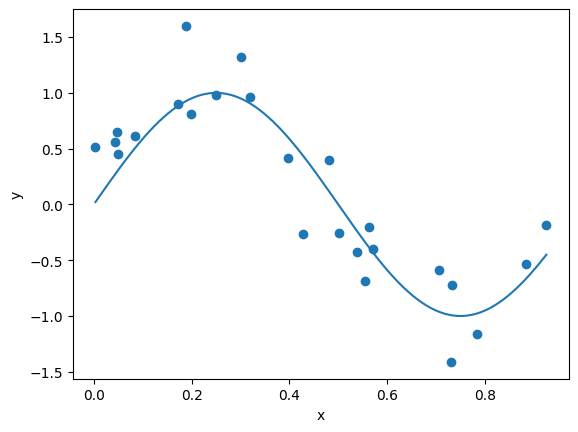

In [15]:
# set up sinusoidal data with Gaussian noise
n = 25
sig_noise = 0.4

# uniform sampling of x
#x = np.linspace(0., 1., n)

# random sampling of x
xrng = np.random.default_rng(seed=87)
x = xrng.random(n)

# add noise to y
dyrng = np.random.default_rng(seed=99)
dy = dyrng.normal(loc=0,scale=sig_noise,size=n)
y = np.sin(2*np.pi*x) + dy

# also plot underlying sin function
xtrue = np.linspace(x.min(), x.max(), 200)
ytrue = np.sin(2*np.pi*xtrue)

# make plots
plt.scatter(x,y)
plt.plot(xtrue,ytrue)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

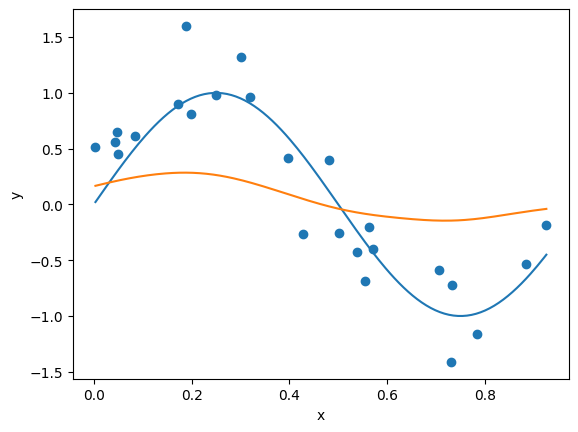

In [21]:
# set up model with Gaussian basis functions of fixed width and regularization parameter
s = .1
lam = 100.

# un-normalized Gaussian 
def gauss(x0,mu,sig):
    return np.exp(-((x0-mu)**2)/(2*(sig**2)))

# define linear model
def yhat(xCol,wCol,muCol,sig):   
    sum = np.zeros_like(xCol)
    for i in range(np.size(xCol)):  
        sum[i] = wCol[0]     
        for j in range(1,np.size(wCol)):
            if j > 0:
                sum[i] += wCol[j]*gauss(xCol[i],muCol[j-1],sig)
            else:
                sum[i] += wCol[j]
    return sum

# calculate design matrix
dmat = np.zeros((n,n+1))
for i in range(n):
    for j in range(n+1):
        if j > 0:
            dmat[i,j] = gauss(x[i],x[j-1],s)
        else:
            dmat[i,j] = 1

# calculate weights using regularized Moore-Penrose pseudo-inverse
w = np.matmul(np.matmul(np.linalg.inv((np.matmul(dmat.T,dmat))+np.identity(n+1)*lam).T,dmat.T),y)
xfit = np.linspace(x.min(), x.max(), 200)
yfit = yhat(xfit,w,x,s)

# plot the fit vs the original function
plt.plot(xtrue,ytrue)
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlabel("x")
plt.ylabel("y")
plt.show()